## **WEB SCRAPING**

### Installing necessary libraries

In [2]:
!pip install requests
!pip install beautifulsoup4
!pip install pandas

### Importing libraries

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### Data Extraction

In [6]:
#Step 1: Fetch the webpage
url = 'https://en.wikipedia.org/wiki/Premier_League_records_and_statistics'
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful

# Step 2: Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Step 3: Locate the table
table = soup.find('table', {'class': 'wikitable'})

# Step 4: Extract headers
headers = [header.text.strip() for header in table.find_all('th')]

# Step 5: Extract rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all(['td', 'th'])
    row_data = [cell.text.strip() for cell in cells]
    rows.append(row_data)

# Step 6: Create a DataFrame
df = pd.DataFrame(rows, columns=headers)

# Step 7: Save to CSV
df.to_csv('premier_league_all_time_table.csv', index=False)

print("Data has been successfully scraped and saved to 'premier_league_all_time_table.csv'.")

Data has been successfully scraped and saved to 'premier_league_all_time_table.csv'.


##  **EDA**

### Data Observation

In [12]:
df = pd.read_csv('premier_league_all_time_table.csv')
print(df.shape)
df.head()

(10, 6)


,Rank,Player,Games,Position,First season,Last season
0,1,Gareth Barry,653,Midfielder,1997–98,2017–18
1,2,James Milner,637,Midfielder,2002–03,2024–25
2,3,Ryan Giggs,632,Midfielder,1992–93,2013–14
3,4,Frank Lampard,609,Midfielder,1995–96,2014–15
4,5,David James,572,Goalkeeper,1992–93,2009–10


In [14]:
## Checking for null values
print(df.isnull().sum())

Rank            0
Player          0
Games           0
Position        0
First season    0
Last season     0
dtype: int64


## Exploring Data & Visualizing

In [16]:
## Basic Statistics of data
df.describe()

,Rank,Games
count,10.00000,10.000000
mean,5.50000,568.100000
std,3.02765,59.681469
min,1.00000,505.000000
25%,3.25000,514.500000
50%,5.50000,553.500000
75%,7.75000,626.250000
max,10.00000,653.000000


## Players with Most Games Played in Premier League

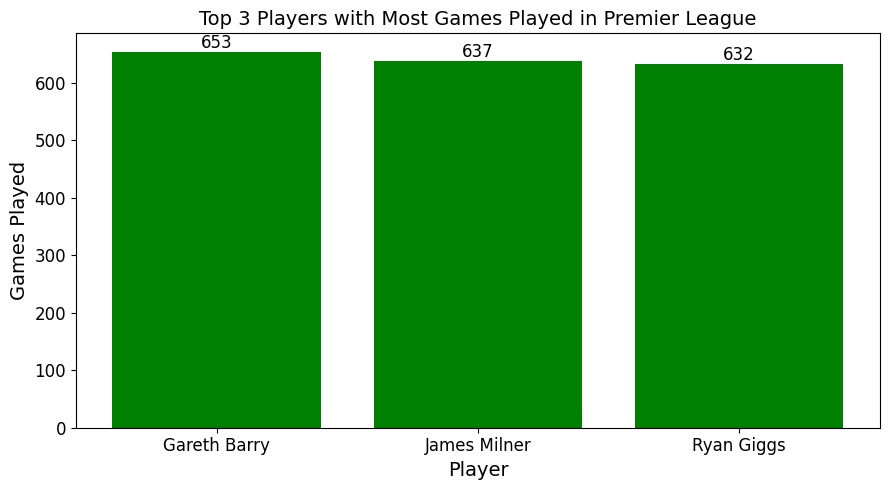

In [27]:
# Top 3 players with most games played
top_players = df.nlargest(3, 'Games')

# Visualization
plt.figure(figsize=(9, 5))
bars = plt.bar(top_players['Player'], top_players['Games'], color='green')

# Add data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height()}', ha='center', va='bottom', fontsize=12)

# Titles and labels
plt.title('Top 3 Players with Most Games Played in Premier League', fontsize=14)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Games Played', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


## Players with Fewest Games Played in Premier League

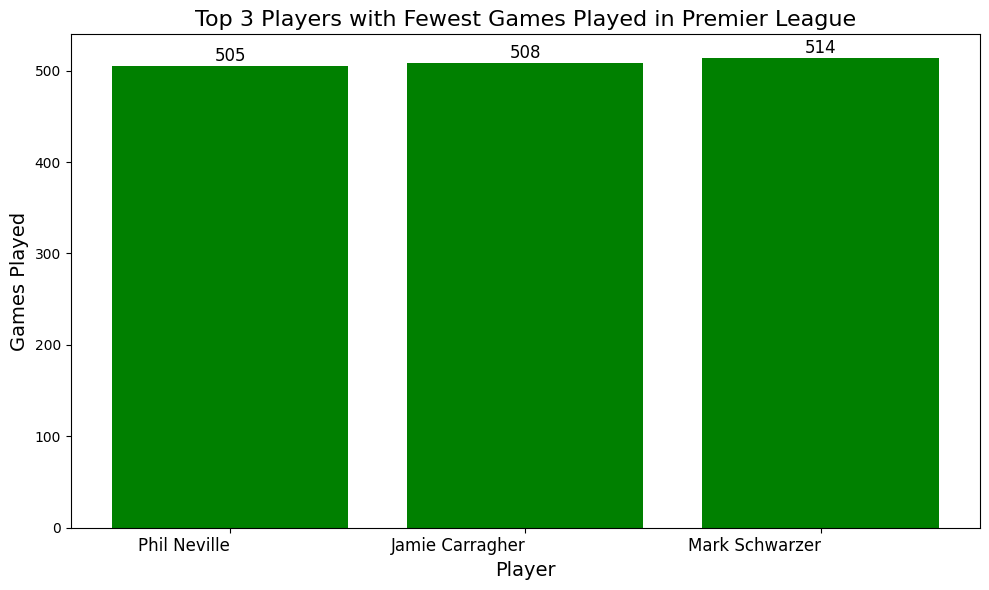

In [29]:
# Bottom 3 players with least games played
bottom_players = df.nsmallest(3, 'Games')

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(bottom_players['Player'], bottom_players['Games'], color='green')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=12)

# Add titles and labels
plt.title('Top 3 Players with Fewest Games Played in Premier League', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Games Played', fontsize=14)
plt.xticks(ha='right', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

## Distribution of Players by Position

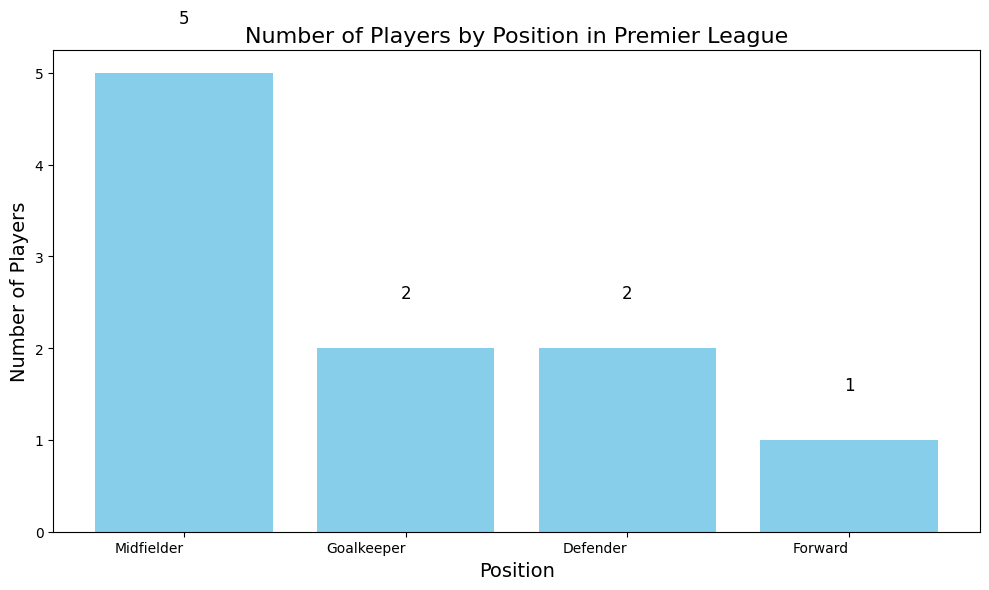

In [31]:
# Count the number of players in each position
position_counts = df['Position'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(position_counts.index, position_counts.values, color='skyblue')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=12)

# Titles and labels
plt.title('Number of Players by Position in Premier League', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(ha='right')

# Display the plot
plt.tight_layout()
plt.show()